### **1. importando pacotes**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2. importando o arquivo excel como dataset**

In [2]:
dataset = pd.read_excel('./dataset/dados_anonimizados_revisado.xlsx')

In [3]:
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0%,24%,66%,8%,1%,0%,0%,0%,0%,0%
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0%,16%,57%,24%,2%,1%,0%,0%,0%,0%
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,1%,20%,47%,29%,3%,0%,0%,0%,0%,0%
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0%,6%,55%,37%,1%,0%,0%,0%,0%,0%
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0%,34%,59%,6%,0%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,11%,64%,19%,4%,1%,0%,0%,0%,0%,0%
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,25%,48%,21%,5%,1%,0%,0%,0%,0%,0%
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,4%,68%,24%,3%,1%,0%,0%,0%,0%,0%
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,8%,87%,4%,1%,0%,0%,0%,0%,0%,0%


In [4]:
dataset.isnull().sum()

id_paciente        0
idade              0
sexo               0
peso               0
altura             0
Sequencia_exame    0
data_inicio        0
data_termino       0
ido                0
fcminima           0
fcmedia            0
fcmaxima           0
bpm1               0
bpm2               0
bpm3               0
bpm4               0
bpm5               0
bpm6               0
bpm7               0
bpm8               0
bpm9               0
bpm10              0
bpm11              0
bpm12              0
bpm13              0
bpm14              0
bpm15              0
dtype: int64

### **3. limpeza inicial dos dados**

In [5]:
dataset.dtypes

id_paciente          int64
idade                int64
sexo                object
peso                 int64
altura               int64
Sequencia_exame      int64
data_inicio         object
data_termino        object
ido                float64
fcminima             int64
fcmedia              int64
fcmaxima             int64
bpm1                object
bpm2                object
bpm3                object
bpm4                object
bpm5                object
bpm6                object
bpm7                object
bpm8                object
bpm9                object
bpm10               object
bpm11               object
bpm12               object
bpm13               object
bpm14               object
bpm15               object
dtype: object

In [6]:
bpms = ['bpm1', 'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 
        'bpm9', 'bpm10', 'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15']

dataset['data_inicio'] = pd.to_datetime(dataset['data_inicio'], format='%Y-%m-%d %H:%M:%S')
dataset['data_termino'] = pd.to_datetime(dataset['data_termino'], format='%Y-%m-%d %H:%M:%S')
dataset['sexo'] = dataset['sexo'].astype('string')

for bpm in bpms:
    dataset[bpm] = dataset[bpm].str.replace(" ", "")
    dataset[bpm] = dataset[bpm].str.strip()

dataset.dtypes

id_paciente                 int64
idade                       int64
sexo                       string
peso                        int64
altura                      int64
Sequencia_exame             int64
data_inicio        datetime64[ns]
data_termino       datetime64[ns]
ido                       float64
fcminima                    int64
fcmedia                     int64
fcmaxima                    int64
bpm1                       object
bpm2                       object
bpm3                       object
bpm4                       object
bpm5                       object
bpm6                       object
bpm7                       object
bpm8                       object
bpm9                       object
bpm10                      object
bpm11                      object
bpm12                      object
bpm13                      object
bpm14                      object
bpm15                      object
dtype: object

In [7]:
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0%,24%,66%,8%,1%,0%,0%,0%,0%,0%
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0%,16%,57%,24%,2%,1%,0%,0%,0%,0%
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,1%,20%,47%,29%,3%,0%,0%,0%,0%,0%
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0%,6%,55%,37%,1%,0%,0%,0%,0%,0%
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0%,34%,59%,6%,0%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,11%,64%,19%,4%,1%,0%,0%,0%,0%,0%
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,25%,48%,21%,5%,1%,0%,0%,0%,0%,0%
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,4%,68%,24%,3%,1%,0%,0%,0%,0%,0%
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,8%,87%,4%,1%,0%,0%,0%,0%,0%,0%


In [8]:
for bpm in bpms:
    dataset[bpm] = dataset[bpm].str.rstrip("%").astype(float)/100

dataset.dtypes

id_paciente                 int64
idade                       int64
sexo                       string
peso                        int64
altura                      int64
Sequencia_exame             int64
data_inicio        datetime64[ns]
data_termino       datetime64[ns]
ido                       float64
fcminima                    int64
fcmedia                     int64
fcmaxima                    int64
bpm1                      float64
bpm2                      float64
bpm3                      float64
bpm4                      float64
bpm5                      float64
bpm6                      float64
bpm7                      float64
bpm8                      float64
bpm9                      float64
bpm10                     float64
bpm11                     float64
bpm12                     float64
bpm13                     float64
bpm14                     float64
bpm15                     float64
dtype: object

In [9]:
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0.00,0.24,0.66,0.08,0.01,0.00,0.0,0.0,0.0,0.0
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0.00,0.16,0.57,0.24,0.02,0.01,0.0,0.0,0.0,0.0
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.01,0.20,0.47,0.29,0.03,0.00,0.0,0.0,0.0,0.0
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0.00,0.06,0.55,0.37,0.01,0.00,0.0,0.0,0.0,0.0
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0.00,0.34,0.59,0.06,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,0.11,0.64,0.19,0.04,0.01,0.00,0.0,0.0,0.0,0.0
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,0.25,0.48,0.21,0.05,0.01,0.00,0.0,0.0,0.0,0.0
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,0.04,0.68,0.24,0.03,0.01,0.00,0.0,0.0,0.0,0.0
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,0.08,0.87,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.0


In [10]:
dataset.isnull().sum()

id_paciente        0
idade              0
sexo               0
peso               0
altura             0
Sequencia_exame    0
data_inicio        0
data_termino       0
ido                0
fcminima           0
fcmedia            0
fcmaxima           0
bpm1               0
bpm2               0
bpm3               0
bpm4               0
bpm5               0
bpm6               0
bpm7               0
bpm8               0
bpm9               0
bpm10              0
bpm11              0
bpm12              0
bpm13              0
bpm14              0
bpm15              0
dtype: int64

### **4. inclusão de features importantes (IMC, grau de obesidade e grau de apneia)**

In [11]:
dataset['imc'] = (dataset['peso']/(dataset['altura']/100*dataset['altura']/100)).round(2)
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0.24,0.66,0.08,0.01,0.00,0.0,0.0,0.0,0.0,28.04
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0.16,0.57,0.24,0.02,0.01,0.0,0.0,0.0,0.0,28.04
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.20,0.47,0.29,0.03,0.00,0.0,0.0,0.0,0.0,28.04
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0.06,0.55,0.37,0.01,0.00,0.0,0.0,0.0,0.0,27.24
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0.34,0.59,0.06,0.00,0.00,0.0,0.0,0.0,0.0,28.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,0.64,0.19,0.04,0.01,0.00,0.0,0.0,0.0,0.0,36.33
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,0.48,0.21,0.05,0.01,0.00,0.0,0.0,0.0,0.0,36.33
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,0.68,0.24,0.03,0.01,0.00,0.0,0.0,0.0,0.0,36.33
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,0.87,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.0,31.62


In [12]:
conditions = [
              dataset['imc'].between(0,17),
              dataset['imc'].between(17,18.49),  
              dataset['imc'].between(18.5,24.99),
              dataset['imc'].between(25.0,29.99),
              dataset['imc'].between(30.0,34.99),
              dataset['imc'].between(35.0,39.99),
              dataset['imc'].ge(40)
             ]
choices = ['muito_abaixo_peso', 'abaixo_peso', 'peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii', 'obesidade_iii']

dataset['situacao_imc'] = np.select(conditions, choices)
dataset   

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc,situacao_imc
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0.66,0.08,0.01,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0.57,0.24,0.02,0.01,0.0,0.0,0.0,0.0,28.04,acima_peso
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.47,0.29,0.03,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0.55,0.37,0.01,0.00,0.0,0.0,0.0,0.0,27.24,acima_peso
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0.59,0.06,0.00,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,0.19,0.04,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,0.21,0.05,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,0.24,0.03,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.0,31.62,obesidade_i


In [13]:
conditions = [
              dataset['ido'].lt(5.0),
              dataset['ido'].between(5.0, 14.99),  
              dataset['ido'].between(15.0, 29.99),
              dataset['ido'].ge(30)
             ]
choices = ['sem_apneia', 'apneia_leve', 'apneia_moderada', 'apneia_acentuada']

dataset['status_apneia'] = np.select(conditions, choices)
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc,situacao_imc,status_apneia
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0.08,0.01,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso,apneia_leve
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0.24,0.02,0.01,0.0,0.0,0.0,0.0,28.04,acima_peso,apneia_leve
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.29,0.03,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso,apneia_leve
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0.37,0.01,0.00,0.0,0.0,0.0,0.0,27.24,acima_peso,apneia_leve
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0.06,0.00,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso,sem_apneia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,0.04,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii,apneia_acentuada
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,0.05,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii,apneia_acentuada
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,0.03,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii,apneia_acentuada
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,0.01,0.00,0.00,0.0,0.0,0.0,0.0,31.62,obesidade_i,sem_apneia


In [14]:
print(dataset.idade.min())
print(dataset.idade.max())

12
80


In [15]:
conditions = [
              dataset['idade'].between(10, 19),  
              dataset['idade'].between(20, 29),
              dataset['idade'].between(30, 39),
              dataset['idade'].between(40, 49),
              dataset['idade'].between(50, 59),
              dataset['idade'].between(60, 69),
              dataset['idade'].between(70, 79),
              dataset['idade'].ge(80)
             ]
choices = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '>80']

dataset['grupo_idade'] = np.select(conditions, choices)
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc,situacao_imc,status_apneia,grupo_idade
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0.01,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso,apneia_leve,40-49
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0.02,0.01,0.0,0.0,0.0,0.0,28.04,acima_peso,apneia_leve,40-49
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.03,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso,apneia_leve,40-49
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0.01,0.00,0.0,0.0,0.0,0.0,27.24,acima_peso,apneia_leve,40-49
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0.00,0.00,0.0,0.0,0.0,0.0,28.04,acima_peso,sem_apneia,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii,apneia_acentuada,60-69
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii,apneia_acentuada,60-69
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,0.01,0.00,0.0,0.0,0.0,0.0,36.33,obesidade_ii,apneia_acentuada,60-69
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,0.00,0.00,0.0,0.0,0.0,0.0,31.62,obesidade_i,sem_apneia,70-79


In [16]:
dataset_bkp = dataset.copy()
dataset = dataset[['id_paciente', 'sexo', 'idade', 'grupo_idade', 'imc', 'situacao_imc', 'ido', 'status_apneia', 'fcminima', 'fcmedia',  'fcmaxima']]
dataset

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,244,f,49,40-49,28.04,acima_peso,6.6,apneia_leve,53,73,107
1,244,f,49,40-49,28.04,acima_peso,5.2,apneia_leve,57,76,111
2,244,f,49,40-49,28.04,acima_peso,6.8,apneia_leve,55,76,110
3,244,f,49,40-49,27.24,acima_peso,8.9,apneia_leve,60,78,114
4,244,f,50,50-59,28.04,acima_peso,3.4,sem_apneia,57,72,108
...,...,...,...,...,...,...,...,...,...,...,...
565,265,m,64,60-69,36.33,obesidade_ii,60.0,apneia_acentuada,53,67,125
566,265,m,64,60-69,36.33,obesidade_ii,87.1,apneia_acentuada,50,65,112
567,265,m,64,60-69,36.33,obesidade_ii,36.4,apneia_acentuada,52,67,112
568,175,f,74,70-79,31.62,obesidade_i,3.1,sem_apneia,53,64,89


### **5. separação de datasets (baseline, primeiro exame e ultimo exame**

In [17]:
dataset_baseline = dataset.groupby('id_paciente').first().reset_index()
dataset_baseline

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,162,f,69,60-69,28.37,acima_peso,57.3,apneia_acentuada,52,62,112
1,163,f,72,70-79,26.30,acima_peso,2.8,sem_apneia,57,70,101
2,164,f,60,60-69,28.60,acima_peso,3.8,sem_apneia,59,70,98
3,165,f,61,60-69,28.12,acima_peso,20.4,apneia_moderada,60,74,103
4,166,m,44,40-49,20.75,peso_normal,0.5,sem_apneia,41,52,116
...,...,...,...,...,...,...,...,...,...,...,...
156,321,f,40,40-49,24.91,peso_normal,1.4,sem_apneia,47,66,129
157,322,m,63,60-69,23.32,peso_normal,1.4,sem_apneia,49,60,101
158,323,m,41,40-49,36.42,obesidade_ii,6.9,apneia_leve,49,62,87
159,324,f,65,60-69,28.39,acima_peso,44.8,apneia_acentuada,58,76,110


In [18]:
dataset_primeiro_exame = dataset.groupby('id_paciente').nth(1).reset_index()
dataset_primeiro_exame

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,162,f,69,60-69,28.37,acima_peso,14.6,apneia_leve,47,55,92
1,163,f,72,70-79,26.30,acima_peso,4.1,sem_apneia,52,64,112
2,164,f,61,60-69,28.98,acima_peso,2.5,sem_apneia,58,69,102
3,165,f,61,60-69,28.12,acima_peso,22.8,apneia_moderada,50,70,95
4,166,m,44,40-49,20.75,peso_normal,0.6,sem_apneia,40,50,109
...,...,...,...,...,...,...,...,...,...,...,...
156,321,f,41,40-49,24.91,peso_normal,1.6,sem_apneia,49,69,126
157,322,m,64,60-69,23.32,peso_normal,0.3,sem_apneia,49,60,98
158,323,m,42,40-49,32.49,obesidade_i,4.4,sem_apneia,47,56,91
159,324,f,65,60-69,28.39,acima_peso,23.3,apneia_moderada,66,82,120


In [19]:
dataset_ultimo_exame = dataset.groupby('id_paciente').last().reset_index()
dataset_ultimo_exame

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,162,f,69,60-69,28.37,acima_peso,14.6,apneia_leve,47,55,92
1,163,f,72,70-79,26.30,acima_peso,4.1,sem_apneia,52,64,112
2,164,f,62,60-69,27.10,acima_peso,3.4,sem_apneia,53,67,97
3,165,f,61,60-69,28.12,acima_peso,22.8,apneia_moderada,50,70,95
4,166,m,44,40-49,20.75,peso_normal,0.6,sem_apneia,40,50,109
...,...,...,...,...,...,...,...,...,...,...,...
156,321,f,41,40-49,24.91,peso_normal,8.6,apneia_leve,48,63,129
157,322,m,65,60-69,19.94,peso_normal,2.8,sem_apneia,45,61,95
158,323,m,43,40-49,30.09,obesidade_i,6.2,apneia_leve,42,55,82
159,324,f,67,60-69,29.41,acima_peso,20.9,apneia_moderada,59,76,118


In [20]:
# validando que cada recorte tem os mesmos pacientes
print(len(dataset_baseline))
print(len(dataset_primeiro_exame))
print(len(dataset_ultimo_exame))
print(list(dataset_baseline.id_paciente) == list (dataset_primeiro_exame.id_paciente))
print(list(dataset_primeiro_exame.id_paciente) == list (dataset_ultimo_exame.id_paciente))

161
161
161
True
True


### **6. visualização de dados**

#### **6.1 distribuição dos dados**

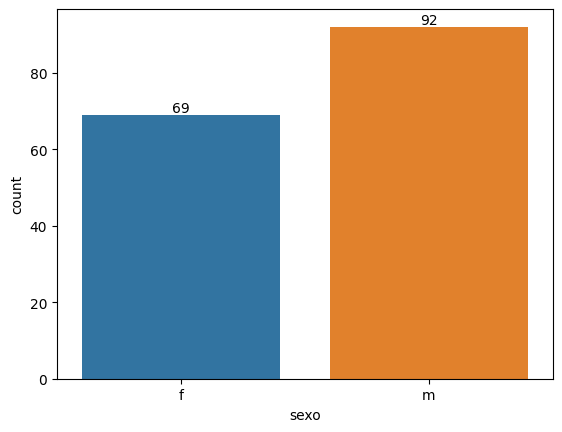

In [21]:
## sexo
ax = sns.countplot(dataset_baseline, x='sexo')
for i in ax.containers:
    ax.bar_label(i,)

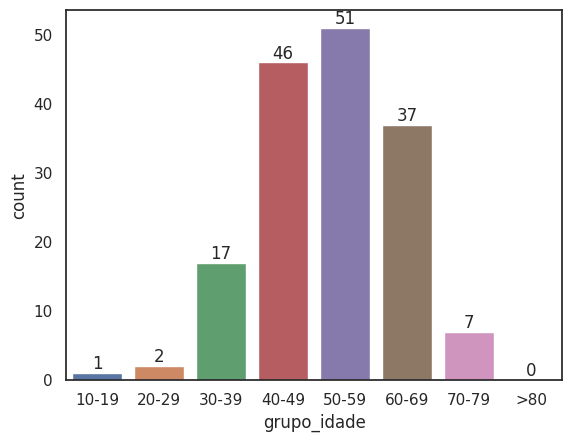

In [86]:
#### idade
ax = sns.countplot(dataset_baseline, x='grupo_idade', order=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '>80'])
for i in ax.containers:
    ax.bar_label(i,)

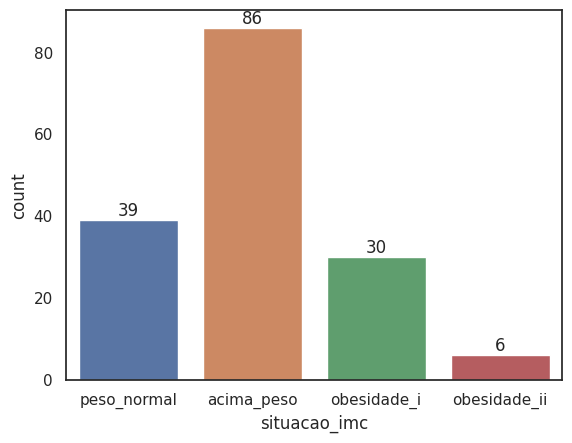

In [82]:
### situacao imc -- baseline
ax = sns.countplot(dataset_baseline, x='situacao_imc', order=['peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii'])
for i in ax.containers:
    ax.bar_label(i,)

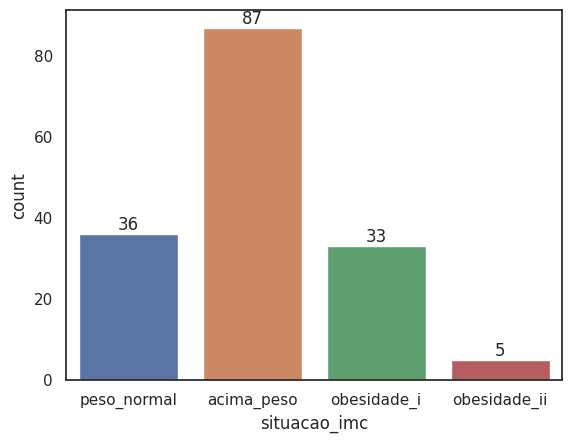

In [83]:
### situacao imc -- primeiro exame
ax = sns.countplot(dataset_primeiro_exame, x='situacao_imc', order=['peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii'])
for i in ax.containers:
    ax.bar_label(i,)

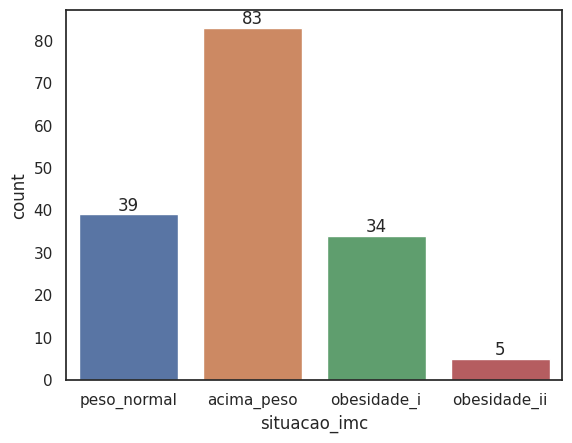

In [84]:
### situacao imc -- ultimo exame
ax = sns.countplot(dataset_ultimo_exame, x='situacao_imc', order=['peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii'])
for i in ax.containers:
    ax.bar_label(i,)

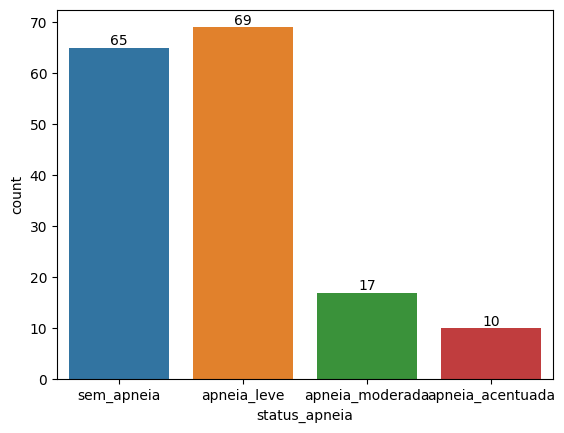

In [26]:
### status apneia -- baseline
ax = sns.countplot(dataset_baseline, x='status_apneia', order=['sem_apneia', 'apneia_leve', 'apneia_moderada',  'apneia_acentuada'])
for i in ax.containers:
    ax.bar_label(i,)

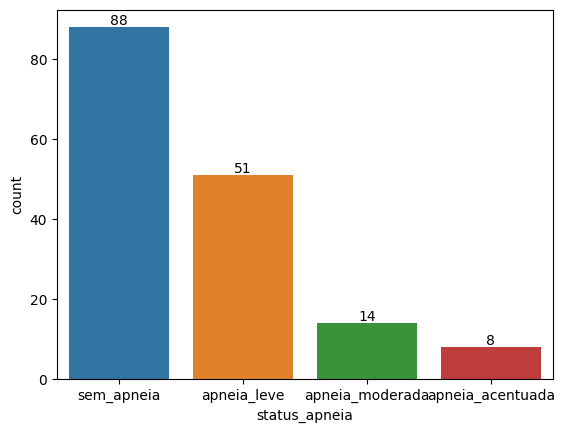

In [27]:
### status apneia -- primeiro exame
ax = sns.countplot(dataset_primeiro_exame, x='status_apneia', order=['sem_apneia', 'apneia_leve', 'apneia_moderada',  'apneia_acentuada'])
for i in ax.containers:
    ax.bar_label(i,)

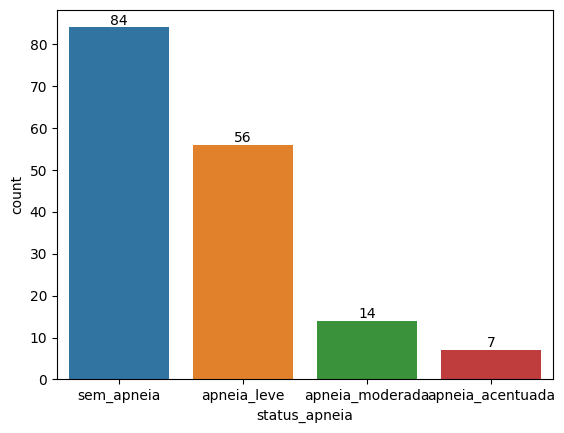

In [28]:
### status apneia -- ultimo exame
ax = sns.countplot(dataset_ultimo_exame, x='status_apneia', order=['sem_apneia', 'apneia_leve', 'apneia_moderada',  'apneia_acentuada'])
for i in ax.containers:
    ax.bar_label(i,)

In [93]:
dataset_baseline['dataset'] = 'baseline'
dataset_primeiro_exame['dataset'] = 'primeiro_exame'
dataset_ultimo_exame['dataset'] = 'ultimo_exame'

concat_dataset = pd.concat([dataset_baseline, dataset_primeiro_exame, dataset_ultimo_exame])
concat_dataset

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima,dataset
0,162,f,69,60-69,28.37,acima_peso,57.3,apneia_acentuada,52,62,112,baseline
1,163,f,72,70-79,26.30,acima_peso,2.8,sem_apneia,57,70,101,baseline
2,164,f,60,60-69,28.60,acima_peso,3.8,sem_apneia,59,70,98,baseline
3,165,f,61,60-69,28.12,acima_peso,20.4,apneia_moderada,60,74,103,baseline
4,166,m,44,40-49,20.75,peso_normal,0.5,sem_apneia,41,52,116,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...
156,321,f,41,40-49,24.91,peso_normal,8.6,apneia_leve,48,63,129,ultimo_exame
157,322,m,65,60-69,19.94,peso_normal,2.8,sem_apneia,45,61,95,ultimo_exame
158,323,m,43,40-49,30.09,obesidade_i,6.2,apneia_leve,42,55,82,ultimo_exame
159,324,f,67,60-69,29.41,acima_peso,20.9,apneia_moderada,59,76,118,ultimo_exame


<AxesSubplot:xlabel='grupo_idade', ylabel='ido'>

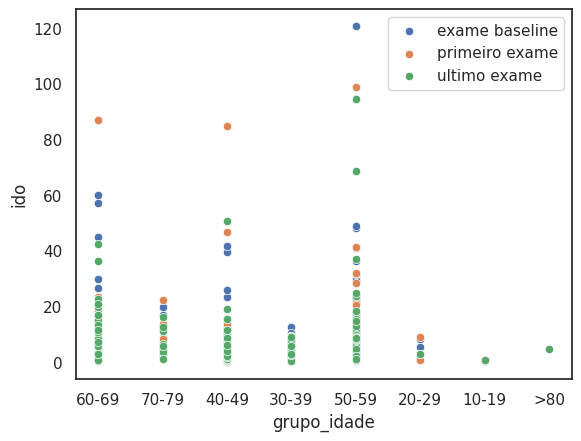

In [103]:
sns.scatterplot(data=dataset_baseline, x='grupo_idade', y='ido', label='exame baseline')
sns.scatterplot(data=dataset_primeiro_exame, x='grupo_idade', y='ido', label='primeiro exame')
sns.scatterplot(data=dataset_ultimo_exame, x='grupo_idade', y='ido', label='ultimo exame')

<AxesSubplot:xlabel='situacao_imc', ylabel='ido'>

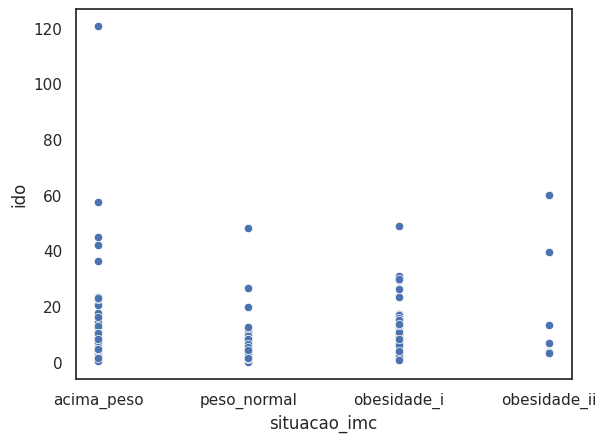

In [101]:
sns.scatterplot(data=dataset_baseline, x='situacao_imc', y='ido')

#### **6.2 correlação entre variáveis**

In [52]:
dataset[dataset.columns[1:]].corr()['ido'][:].sort_values(ascending=False).to_frame().dropna()

,ido
ido,1.000000
imc,0.316099
fcmedia,0.211895
fcmaxima,0.165490
fcminima,0.155432
idade,0.144683


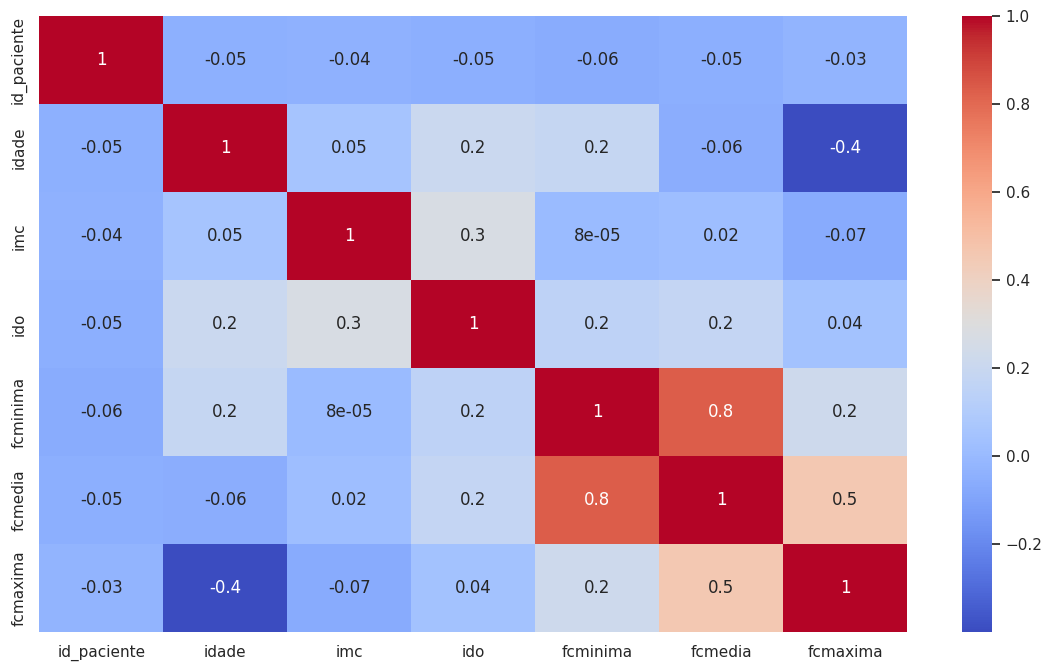

In [53]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dataset_baseline.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

<AxesSubplot:xlabel='idade', ylabel='ido'>

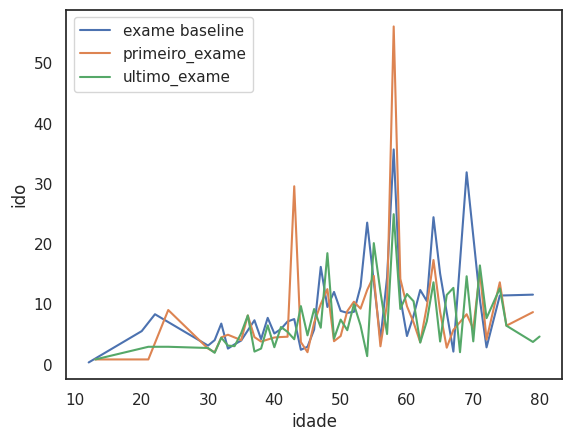

In [74]:
# evolucao de ido entre exames
sns.lineplot(data=dataset_baseline, x='idade', y='ido', errorbar=None, label='exame baseline')
sns.lineplot(data=dataset_primeiro_exame, x='idade', y='ido', errorbar=None, label='primeiro_exame')
sns.lineplot(data=dataset_ultimo_exame, x='idade', y='ido', errorbar=None, label='ultimo_exame')

<AxesSubplot:xlabel='idade', ylabel='fcmedia'>

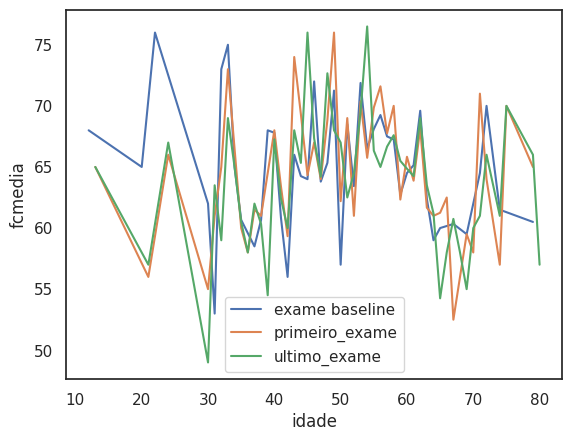

In [81]:
# evolucao de fcmedia entre exames
sns.lineplot(data=dataset_baseline, x='idade', y='fcmedia', errorbar=None, label='exame baseline')
sns.lineplot(data=dataset_primeiro_exame, x='idade', y='fcmedia', errorbar=None, label='primeiro_exame')
sns.lineplot(data=dataset_ultimo_exame, x='idade', y='fcmedia', errorbar=None, label='ultimo_exame')

<AxesSubplot:xlabel='idade', ylabel='fcmaxima'>

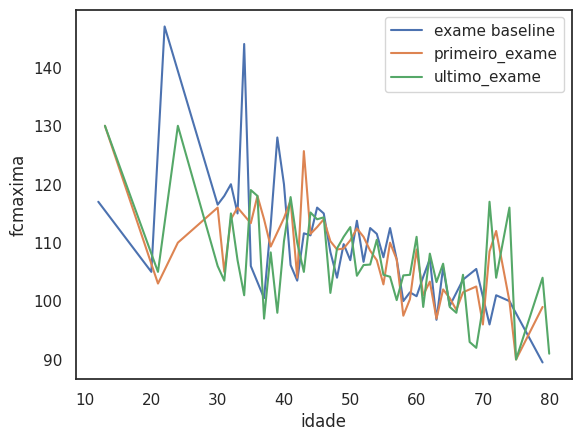

In [76]:
# evolucao de fcmaxima entre exames
sns.lineplot(data=dataset_baseline, x='idade', y='fcmaxima', errorbar=None, label='exame baseline')
sns.lineplot(data=dataset_primeiro_exame, x='idade', y='fcmaxima', errorbar=None, label='primeiro_exame')
sns.lineplot(data=dataset_ultimo_exame, x='idade', y='fcmaxima', errorbar=None, label='ultimo_exame')